# **Project 3: Space Rats**
Remington Katz & Giovane Kim

CS 520

In [1]:
import random
import copy
import math
import torch
import copy

## **Ship and other methods**

### **Generate the Board**

In [2]:
class ship():
    def __init__(self, d):
        self.dim = d
        self.ship_display = [['■' for i in range(d)] for j in range(d)] #■ for blocked i.e. not open
        self.open_ship = None
        self.start = ()
        self.bot_location = None
        self.rat_location = None
        self.pinged = set()

        #Choose a square in the interior to open at random
        y = random.randint(1, d-2)
        x = random.randint(1, d-2)
        self.ship_display[y][x] = 'O' #O for open
        #The board display can be imagined as Quadrant IV of a cartesian coordinate system, where the origin is in the top left and you read a coordinate as y spaces down and x spaces to the right
        #Iteratively do the following... (from assignment)
        while True:
            one_open_neighbor = list()
            for row in range(1, d-1):
                for col in range(1, d-1):
                    if self.ship_display[row][col] == '■':
                        open_neighbor_count = 0
                        if (row+1 <= d-1) and (self.ship_display[row+1][col] == 'O'):
                            open_neighbor_count += 1
                        if (row-1 >= 0) and (self.ship_display[row-1][col] == 'O'):
                            open_neighbor_count += 1
                        if (col+1 <= d-1) and (self.ship_display[row][col+1] == 'O'):
                            open_neighbor_count += 1
                        if (col-1 >= 0) and (self.ship_display[row][col-1] == 'O'):
                            open_neighbor_count += 1
                        if open_neighbor_count == 1:
                            one_open_neighbor.append((row,col))
            if len(one_open_neighbor) == 0:
                break
            random_neighbor = random.sample(one_open_neighbor, 1)[0]
            self.ship_display[random_neighbor[0]][random_neighbor[1]] = 'O'
        #ship.print_ship(self)

        #Open dead ends; pick random closed neighbor and open it
        dead_ends_list = list()
        for row in range(1, d-1):
            for col in range(1, d-1):
                if self.ship_display[row][col] == 'O':
                    open_neighbor_count = 0
                    if (row+1 <= d-1) and (self.ship_display[row+1][col] == 'O'):
                        open_neighbor_count += 1
                    if (row-1 >= 0) and (self.ship_display[row-1][col] == 'O'):
                        open_neighbor_count += 1
                    if (col+1 <= d-1) and (self.ship_display[row][col+1] == 'O'):
                        open_neighbor_count += 1
                    if (col-1 >= 0) and (self.ship_display[row][col-1] == 'O'):
                        open_neighbor_count += 1
                    if open_neighbor_count == 1:
                        dead_ends_list.append((row,col))
        half = len(dead_ends_list)//2
        dead_ends = random.sample(dead_ends_list, half)
        #print(dead_ends_list)
        #print(dead_ends)
        for dead_end in dead_ends:
            dead_end_blocked_neighbor = list()
            if (dead_end[0]+1 <= d-1) and (self.ship_display[dead_end[0]+1][dead_end[1]] == '■'):
                dead_end_blocked_neighbor.append((dead_end[0]+1, dead_end[1]))
            if (dead_end[0]-1 >= 0) and (self.ship_display[dead_end[0]-1][dead_end[1]] == '■'):
                dead_end_blocked_neighbor.append((dead_end[0]-1, dead_end[1]))
            if (dead_end[1]+1 <= d-1) and (self.ship_display[dead_end[0]][dead_end[1]+1] == '■'):
                dead_end_blocked_neighbor.append((dead_end[0], dead_end[1]+1))
            if (dead_end[1]-1 >= 0) and (self.ship_display[dead_end[0]][dead_end[1]-1] == '■'):
                dead_end_blocked_neighbor.append((dead_end[0], dead_end[1]-1))
            #print(dead_end_blocked_neighbor)
            if dead_end_blocked_neighbor != []: #Make sure block neighbor was not previously removed
                random_blocked_neighbor = random.sample(dead_end_blocked_neighbor, 1)[0]
                self.ship_display[random_blocked_neighbor[0]][random_blocked_neighbor[1]] = 'O'

        #Close outer edge cells
        for i in range(d):
            self.ship_display[0][i] = '■'
            self.ship_display[d-1][i] = '■'
            self.ship_display[i][0] = '■'
            self.ship_display[i][d-1] = '■'

        self.open_ship = copy.deepcopy(self.ship_display) #Keep a copy of the original ship to see which cells are opened/blocked

    #Print a 2D array representing the ship in a way that makes it appear as a maze to a human.
    #This version specifically only shows the original open and blocked cells when the maze is generated.
    def print_open_ship(self):
        for row in self.open_ship:
            formatted_row = ["{:1}".format(x) for x in row]
            print(" ".join(formatted_row))

    def flatten(self, row, col):
	    return row*self.dim + col

In [3]:
#Print a 2D array representing the ship in a way that makes it appear as a maze to a human.
#To be used for the ship display at specific times
def print_ship(ship):
    for row in ship.ship_display:
        formatted_row = ["{:1}".format(x) for x in row]
        print(" ".join(formatted_row))

In [4]:
def print_mat(mat):
    for row in mat:
        formatted_row = ["{:1}".format(x) for x in row]
        print(" ".join(formatted_row))

In [5]:
#An example of the ship and it being printed two ways, printing the originally generated ship as well as the current display
ship_1 = ship(30)
ship_1.print_open_ship()
print()
print_ship(ship_1)

■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■
■ O O ■ O O O O O O ■ O O ■ O O ■ O O O O ■ O ■ O O ■ O O ■
■ O ■ O O ■ O O O O O O ■ O ■ O ■ O O O ■ O O ■ O ■ O ■ O ■
■ O ■ O ■ O O O ■ O O ■ O O O O O O O ■ O O ■ O O ■ O ■ O ■
■ O ■ O ■ O O O O ■ O ■ ■ O ■ O ■ ■ ■ O ■ O O O ■ ■ O ■ O ■
■ O ■ O O O ■ O O ■ O O O O ■ O O O O O O O ■ ■ O O O O O ■
■ O O O O ■ O O ■ O O ■ O O O ■ O O O ■ O O O O O O O ■ O ■
■ O ■ O O O O O O ■ O O O O O O O ■ O O ■ O O O O O ■ O O ■
■ O O O ■ O ■ O ■ O O ■ ■ O ■ ■ O ■ ■ O O O O O O O O ■ O ■
■ O ■ ■ O O O O O O ■ O O O O O O O O O ■ O O O ■ ■ O O O ■
■ O O ■ O O O ■ ■ O O O O O ■ ■ O O O O O ■ O O O O O ■ O ■
■ O O ■ ■ O O O O O ■ ■ O O O O O ■ O ■ O ■ O ■ O O ■ O O ■
■ O O ■ O O O O ■ O O O ■ ■ O O ■ O O O O O O ■ O ■ ■ O ■ ■
■ O ■ O O O O O ■ O ■ O O O O ■ O ■ ■ ■ O O ■ O O O O O O ■
■ O O O O O ■ O O O O O O O O ■ O ■ O O O O ■ O ■ O ■ ■ O ■
■ O ■ O O O O ■ O ■ ■ O O O O O O O ■ ■ O O O O ■ O O ■ O ■
■ O ■ O ■ O ■ O O O ■ O ■ O O ■ ■ O O O 

### **Place Bot, Rat**



In [6]:
#Place elements on the ship
def place_element(ship, element):
    random_cell_state = None
    while random_cell_state != 'O':
        row = random.randint(0, ship.dim-1)
        col = random.randint(0, ship.dim-1)
        if ship.open_ship[row][col] == 'O':
            ship.ship_display[row][col] = element
            random_cell_state = 'O'
            if element == 'B':
                ship.start = (row,col)
                ship.bot_location = ship.start
            if element == 'R':
                ship.rat_location = (row,col)
    return ship

#### test

In [7]:
d = 10
ship_2 = ship(d)

place_element(ship_2,'B')
place_element(ship_2,'R')

print(ship_2.start)
print(ship_2.bot_location)
print(ship_2.rat_location)
print_ship(ship_2)
#bot1(ship_2)

(6, 8)
(6, 8)
(2, 3)
■ ■ ■ ■ ■ ■ ■ ■ ■ ■
■ O O ■ O ■ O O ■ ■
■ O O R O O ■ O O ■
■ ■ ■ O ■ ■ O ■ O ■
■ ■ O O O ■ O O O ■
■ O O ■ O O O ■ O ■
■ O ■ O O ■ ■ O B ■
■ O O O ■ O O O O ■
■ O ■ O O O ■ O O ■
■ ■ ■ ■ ■ ■ ■ ■ ■ ■


### **3 Actions**

In [8]:
def neighbors_blocked(ship, bot_location_map): #Count number of cells neighboring bot that are blocked
  num_neighbors_currently_blocked = 0
  y = ship.bot_location[0]
  x = ship.bot_location[1]
  for i in range(-1,2):
    for j in range(-1,2):
      if not (i == 0 and j == 0):
        if bot_location_map[y + i][x + j] == 0:
          num_neighbors_currently_blocked += 1
  return num_neighbors_currently_blocked

In [9]:
def ping(ship, alpha, rat_KB): #Return ping (1) or no ping (0), or location is shared between bot and rat (-1)
  if ship.bot_location == ship.rat_location:
    return -1 #Bot and rat in same location
  bot_y = ship.bot_location[0]
  bot_x = ship.bot_location[1]
  rat_y = ship.rat_location[0]
  rat_x = ship.rat_location[1]
  manhattan_dist = abs(bot_y-rat_y) + abs(bot_x-rat_x)
  prob_hearing_ping = math.e ** (-1 * alpha * (manhattan_dist - 1))
  if random.uniform(0,1) < prob_hearing_ping:
    return 1 #ping
  else:
    return 0 #no ping

In [10]:
def attempt_to_move(ship, most_common_direction): #Update ship display and bot location if bot can move
  y = ship.bot_location[0]
  x = ship.bot_location[1]
  if most_common_direction == 'U':
    if ship.ship_display[y-1][x] != '■':
      ship.ship_display[y-1][x] = 'B'
      ship.bot_location = (y-1,x)
      ship.ship_display[y][x] = 'O'
      return True #Bot moved
    else:
      return False #Can't walk into a wall
  if most_common_direction == 'D':
    if ship.ship_display[y+1][x] != '■':
      ship.ship_display[y+1][x] = 'B'
      ship.bot_location = (y+1,x)
      ship.ship_display[y][x] = 'O'
      return True #Bot moved
    else:
      return False #Can't walk into a wall
  if most_common_direction == 'L':
    if ship.ship_display[y][x-1] != '■':
      ship.ship_display[y][x-1] = 'B'
      ship.bot_location = (y,x-1)
      ship.ship_display[y][x] = 'O'
      return True #Bot moved
    else:
      return False #Can't walk into a wall
  if most_common_direction == 'R':
    if ship.ship_display[y][x+1] != '■':
      ship.ship_display[y][x+1] = 'B'
      ship.bot_location = (y,x+1)
      ship.ship_display[y][x] = 'O'
      return True #Bot moved
    else:
      return False #Can't walk into a wall

### **Helper Methods**

In [11]:
def print_knowledge_base(knowledge_base): #to be used for the bot KB, the rat KB, or the matrix of blocked neighbors
  for row in knowledge_base:
    formatted_row = ["{:1}".format(x) for x in row]
    print(" ".join(formatted_row))

In [12]:
def num_blocked_neighbors(ship): #needs to be computed once only, gets the number of blocked neighbors for each cell in the ship
  blocked_neighbor_matrix = [[0 for a in range(d)] for b in range(d)]
  for row in range(0,d):
    for col in range(0,d):
      num_neighbors_currently_blocked = 0
      for i in range(-1,2):
        for j in range(-1,2):
          if (not (i == 0 and j == 0)) and (i+row>=0) and (j+col>=0) and (i+row<=d-1) and (j+col<=d-1):
            if ship.open_ship[row + i][col + j] == '■':
              num_neighbors_currently_blocked += 1
      blocked_neighbor_matrix[row][col] =  num_neighbors_currently_blocked
  return blocked_neighbor_matrix

In [13]:
def identify_direction(bot_location_map): #identify most commonly open direction of remaining squares that the bot could be on
  up_count = 0
  down_count = 0
  left_count = 0
  right_count = 0
  for row in range(0,d):
    for col in range(0,d):
      if bot_location_map[row][col] != 0:
        if (row-1>=0) and (bot_location_map[row-1][col] != 0):
          up_count += 1
        if (row+1<=d-1) and (bot_location_map[row+1][col] != 0):
          down_count += 1
        if (col-1>=0) and (bot_location_map[row][col-1] != 0):
          left_count += 1
        if (col+1<=d-1) and (bot_location_map[row][col+1] != 0):
          right_count += 1

  max_count = max(up_count, down_count, left_count, right_count)
  direction_to_choose = []
  if up_count == max_count:
    direction_to_choose.append('U')
  if down_count == max_count:
    direction_to_choose.append('D')
  if left_count == max_count:
    direction_to_choose.append('L')
  if right_count == max_count:
    direction_to_choose.append('R')
  return random.choice(direction_to_choose)

In [14]:
def count_bot_locations(bot_location_map): #Counts the number of open (not blocked) cells on the map
  locations = 0
  for row in range(0,d):
    for col in range(0,d):
      if bot_location_map[row][col] == 2:
        locations += 1
  return locations

In [15]:
def set_initial_probs(rat_location_probs):
  open_counter = 0
  for row in range(0,d): #Set inital cell probs to 0 if blocked cell
    for col in range(0,d):
      if rat_location_probs[row][col] == '■':
        rat_location_probs[row][col] = 0
      else:
        open_counter += 1
  for row in range(0,d): #Set initial cell probs to 1 divided by total open cells if open cell
    for col in range(0,d):
      if rat_location_probs[row][col] != 0:
        rat_location_probs[row][col] = 1 / open_counter

#### BFS

In [16]:
#Helper method for ship traversal - utilize bfs to find shortest path
def get_shortest_path(ship, rat_predicted_location):
  neighbors = []
  visited = set()
  prev = dict()
  neighbors.append(ship.bot_location)
  #print('neighbors', neighbors)
  #print('bot location', ship.bot_location)
  visited.add(ship.bot_location)
  prev[ship.bot_location] = None
  board = ship.ship_display
  found = False
  while(True):
    #print_ship(ship)
    if len(neighbors) < 1:
      break
    row, col = neighbors.pop(0)
    #print('3', (row,col))
    #print('4', rat_predicted_location)
    if((row,col) == rat_predicted_location): #not rat's actual location, rather where rat is most likely to be
      path = retrace(prev, (row, col))
      return path
      break

    if(row - 1 >= 0 and ship.ship_display[row-1][col] != '■' and (row-1, col) not in visited):
      neighbors.append((row-1, col))
      visited.add((row-1, col))
      prev[(row-1, col)] = (row, col)

    if(row + 1 < ship.dim and ship.ship_display[row+1][col] != '■' and (row+1, col) not in visited):
      neighbors.append((row+1, col))
      visited.add((row+1, col))
      prev[(row+1, col)] = (row, col)

    if(col-1 >= 0 and ship.ship_display[row][col-1] != '■' and (row, col-1) not in visited):
      neighbors.append((row, col-1))
      visited.add((row, col-1))
      prev[(row, col-1)] = (row, col)

    if(col + 1 < ship.dim and ship.ship_display[row][col+1] != '■' and (row, col+1) not in visited):
      neighbors.append((row, col+1))
      visited.add((row, col+1))
      prev[(row, col+1)] = (row, col)

def retrace(prev, start):
  route = []
  while(prev[start] != None):
    route.append(start)
    start = prev[start]
  route.reverse()
  #print(route)
  return route

## **Stationary Rat**

### Bot

In [ ]:
#the first phase of this bot is exactly the same as the baseline bot
#the second phase is different. We keep track of the highest probability of rat to distance ratio cell.
def bot2(ship, alpha, xData, yData):
  #initialize the action varibles
  movements_taken = 0
  cell_sensing_actions = 0
  rat_detecting_actions = 0
  #initialize direction max out
  direction_max_out = 0
  #initialize bot KB
  bot_location_map = copy.deepcopy(ship.open_ship)
  bot_location_known = False
  direction_to_move = None
  blocked_neighb_counts = num_blocked_neighbors(ship)
  for i in range(d):
    for j in range(d):
      if bot_location_map[i][j] == '■':
        bot_location_map[i][j] = 0
      elif bot_location_map[i][j]=='O':
        bot_location_map[i][j] = 2
      elif bot_location_map[i][j]=='F':
        bot_location_map[i][j] = 1

  #initialize rat KB
  rat_location_probs = copy.deepcopy(ship.open_ship)
  set_initial_probs(rat_location_probs)
  rat_location_known = False

  # PHASE 1
  while not bot_location_known:
    num_neighb_blckd = neighbors_blocked(ship, bot_location_map) #senses num of blocked neighbors
    cell_sensing_actions += 1

    #Turn bot locations KB into a tensor:
    bot_tensor = torch.tensor(bot_location_map).flatten()
    #Turn rat location probabilities KB into a tensor:
    KB = [[0 for i in range(d)] for j in range(d)]
    for i in range(d):
      for j in range(d):
        probability = rat_location_probs[i][j]
        KB[i][j] = probability
    rat_tensor = torch.tensor(KB).flatten()
    #Add board and KB data to training/testing data
    board_KB_tensor = torch.cat((bot_tensor,rat_tensor), dim=0)
    xData = torch.cat((xData, board_KB_tensor), dim=0)
    yData = torch.cat((yData, torch.tensor([movements_taken+rat_detecting_actions+cell_sensing_actions])), dim=0)

    for row in range(0,d): #rule out all locations in knowledge base that do not agree with num_neighb_blckd
      for col in range(0,d):
        if (blocked_neighb_counts[row][col] != num_neighb_blckd) and (bot_location_map[row][col] == 2):
          bot_location_map[row][col] = 1 #F for the bot cannot possibly be there

    direction_to_move = identify_direction(bot_location_map) #get the direction to move the bot in

#weird edge case fix
    if random.uniform(0,1) < 0.2 and direction_max_out < 1: #Sometimes choose a random direction to avoid getting caught in a loop
      #print('random')
      prob = random.uniform(0,1)
      if prob < 0.25:
        hold_this_direction = 'U'
      elif prob < 0.5:
        hold_this_direction = 'D'
      elif prob < 0.75:
        hold_this_direction = 'L'
      else:
        hold_this_direction = 'R'
      direction_max_out = 5
    if direction_max_out > 0:
      direction_max_out -= 1
      direction_to_move = hold_this_direction

    if random.uniform(0,1) < 0.1:
      prob = random.uniform(0,1)
      if prob < 0.25:
        direction_to_move = 'U'
      elif prob < 0.5:
        direction_to_move = 'D'
      elif prob < 0.75:
        direction_to_move = 'L'
      else:
        direction_to_move = 'R'


    moved = attempt_to_move(ship, direction_to_move) #move the bot on the ship display if possible


    if moved: #If bot moved, rule out all locations where bot could not move in that direction
      movements_taken += 1

      #Turn bot locations KB into a tensor:
      bot_tensor = torch.tensor(bot_location_map).flatten()
      #Turn rat location probabilities KB into a tensor:
      KB = [[0 for i in range(d)] for j in range(d)]
      for i in range(d):
        for j in range(d):
          probability = rat_location_probs[i][j]
          KB[i][j] = probability
      rat_tensor = torch.tensor(KB).flatten()
      #Add board and KB data to training/testing data
      board_KB_tensor = torch.cat((bot_tensor,rat_tensor), dim=0)
      xData = torch.cat((xData, board_KB_tensor), dim=0)
      yData = torch.cat((yData, torch.tensor([movements_taken+rat_detecting_actions+cell_sensing_actions])), dim=0)

      for row in range(0,d):
        for col in range(0,d):
          if direction_to_move == 'U':
            if (row-1>=0) and (ship.open_ship[row-1][col] == '■') and (bot_location_map[row][col] != 0):
              bot_location_map[row][col] = 1
          if direction_to_move == 'D':
            if (row+1<=d-1) and (ship.open_ship[row+1][col] == '■') and (bot_location_map[row][col] != 0):
              bot_location_map[row][col] = 1
          if direction_to_move == 'L':
            if (col-1>=0) and (ship.open_ship[row][col-1] == '■') and (bot_location_map[row][col] != 0):
              bot_location_map[row][col] = 1
          if direction_to_move == 'R':
            if (col+1<=d-1) and (ship.open_ship[row][col+1] == '■') and (bot_location_map[row][col] != 0):
              bot_location_map[row][col] = 1

      bot_location_map_copy = [[None for a in range(d)] for b in range(d)] #Update cells where bot could be by 1 cell in appropriate direction ('O' cells move 1 in appropriate direction)
      for row in range(0,d):
        for col in range(0,d):
          if bot_location_map[row][col] == 0:
            bot_location_map_copy[row][col] = 0
          elif (direction_to_move == 'U') and (row+1<=d-1) and (bot_location_map[row+1][col] == 2):
            bot_location_map_copy[row][col] = 2
          elif (direction_to_move == 'D') and (row-1>=0) and (bot_location_map[row-1][col] == 2):
            bot_location_map_copy[row][col] = 2
          elif (direction_to_move == 'L') and (col+1<=d-1) and (bot_location_map[row][col+1] == 2):
            bot_location_map_copy[row][col] = 2
          elif (direction_to_move == 'R') and (col-1>=0) and (bot_location_map[row][col-1] == 2):
            bot_location_map_copy[row][col] = 2
          else:
            bot_location_map_copy[row][col] = 1
      bot_location_map = bot_location_map_copy

    else: #If bot did not move, rule out all locations where bot could move in that direction
      for row in range(0,d):
        for col in range(0,d):
          if bot_location_map[row][col] == 'O':
            if direction_to_move == 'U':
              if (row-1>=0) and (ship.open_ship[row-1][col] != '■'):
                bot_location_map[row][col] = 1
            if direction_to_move == 'D':
              if (row+1<=d-1) and (ship.open_ship[row+1][col] != '■'):
                bot_location_map[row][col] = 1
            if direction_to_move == 'L':
              if (col-1>=0) and (ship.open_ship[row][col-1] != '■'):
                bot_location_map[row][col] = 1
            if direction_to_move == 'R':
              if (col+1<=d-1) and (ship.open_ship[row][col+1] != '■'):
                bot_location_map[row][col] = 1


    if count_bot_locations(bot_location_map) == 1: #Successfully found bot's location
      bot_location_known = True

  bot_location = ship.bot_location

  # PHASE 2:
  #Instead of just moving once at time, the bot will move to the location with the highest probability/distance ratio and then ping again
  #the exception being if the cell it is currently in has a probability higher than a given number

  while not rat_location_known:
    pinged = ping(ship, alpha, rat_location_probs) #use the sensor
    rat_detecting_actions += 1


    #Turn bot locations KB into a tensor:
    bot_tensor = torch.tensor(bot_location_map).flatten()
    #Turn rat location probabilities KB into a tensor:
    KB = [[0 for i in range(d)] for j in range(d)]
    for i in range(d):
      for j in range(d):
        probability = rat_location_probs[i][j]
        KB[i][j] = probability
    rat_tensor = torch.tensor(KB).flatten()
    #Add board and KB data to training/testing data
    board_KB_tensor = torch.cat((bot_tensor,rat_tensor), dim=0)
    xData = torch.cat((xData, board_KB_tensor), dim=0)
    yData = torch.cat((yData, torch.tensor([movements_taken+rat_detecting_actions+cell_sensing_actions])), dim=0)


    #SET PROBABILITIES BASED ON PING
    if pinged == -1: #Bot and rat are in same square
      rat_location_known = True

    if pinged == 1: #Bot heard ping (rat not in the current cell)
      ship.pinged.add(ship.bot_location)
      for row in range(0,d):
        for col in range(0,d): # new prob times old prob relative to dist between bot and rat
          rat_location_probs[row][col] = (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1))) * (rat_location_probs[row][col]) / (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1)))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.0000000000000001

    if pinged == 0: #Bot does not hear ping (rat not in the current cell)
      ship.pinged.add(ship.bot_location)
      for row in range(0,d):
        for col in range(0,d):
          rat_location_probs[row][col] = (1 - (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1)))) * (rat_location_probs[row][col]) / (1 - (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1))))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.0000000000000001


    highest_ratio_location = (None,None) #stores the coordinates of the highest probability/distance ratio
    max_ratio = 0

    for row in range(0,d): #get cell with highest prob/dist ratio
      for col in range(0,d):
        if rat_location_probs[row][col] != 0 and ship.bot_location != (row,col):
          dist = len(get_shortest_path(ship,(row,col)))
          if (row,col) in ship.pinged:
            rat_location_probs[row][col] = 0
          else:
            if rat_location_probs[row][col]/dist > max_ratio and (row,col) != ship.bot_location:
              max_ratio = rat_location_probs[row][col]
              highest_ratio_location = (row,col)

    path = get_shortest_path(ship, highest_ratio_location) #find shortest path
    if path == None:
      break
    else:
      original_path_length = len(path)


    if pinged == 0: #if the bot did not hear a ping, move the bot all the way to the cell more times
      distance_walked = 0
      while distance_walked<original_path_length/20*alpha:
        i = 0
        next_cell = path[i]
        bot_prev_location = ship.bot_location
        ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
        ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
        ship.bot_location = next_cell
        movements_taken += 1


        #Turn bot locations KB into a tensor:
        bot_tensor = torch.tensor(bot_location_map).flatten()
        #Turn rat location probabilities KB into a tensor:
        KB = [[0 for i in range(d)] for j in range(d)]
        for i in range(d):
          for j in range(d):
            probability = rat_location_probs[i][j]
            KB[i][j] = probability
        rat_tensor = torch.tensor(KB).flatten()
        #Add board and KB data to training/testing data
        board_KB_tensor = torch.cat((bot_tensor,rat_tensor), dim=0)
        xData = torch.cat((xData, board_KB_tensor), dim=0)
        yData = torch.cat((yData, torch.tensor([movements_taken+rat_detecting_actions+cell_sensing_actions])), dim=0)

        distance_walked += 1
        #check to see if the cell the bot is currently in has a probability higher than 1%. If so, ping again.
        if rat_location_probs[ship.bot_location[0]][ship.bot_location[1]] >=0.01:
          break
        i +=1
    elif pinged == 1: #if the bot heard a ping, move the bot one square along the path
      next_cell = path[0]
      bot_prev_location = ship.bot_location
      ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
      ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
      ship.bot_location = next_cell
      movements_taken += 1

      #Turn bot locations KB into a tensor:
      bot_tensor = torch.tensor(bot_location_map).flatten()
      #Turn rat location probabilities KB into a tensor:
      KB = [[0 for i in range(d)] for j in range(d)]
      for i in range(d):
        for j in range(d):
          probability = rat_location_probs[i][j]
          KB[i][j] = probability
      rat_tensor = torch.tensor(KB).flatten()
      #Add board and KB data to training/testing data
      KB_tensor = torch.cat((bot_tensor,rat_tensor), dim=0)
      xData = torch.cat((xData, KB_tensor), dim=0)
      yData = torch.cat((yData, torch.tensor([movements_taken+rat_detecting_actions+cell_sensing_actions])), dim=0)

  return movements_taken + cell_sensing_actions + rat_detecting_actions, movements_taken, cell_sensing_actions, rat_detecting_actions, xData, yData

**Generate Training Data**

In [129]:
total_moves =0
games = 500

xTrainingData= torch.empty((0))
yTrainingData= torch.empty((0))

d=30

ship = ship(d)

for game in range(games):
  ship.pinged = set()
  xTrain = torch.empty((0))
  yTrain = torch.empty((0))

  #reset ship_display
  for i in range(d):
    for j in range(d):
      if ship.ship_display[i][j] != '■':
        ship.ship_display[i][j] = 'O'

  #Place bot in ship
  place_element(ship,'B')
  #Place rat in ship
  place_element(ship,'R')


  total_moves, movements_taken, cell_sensing_actions, rat_detecting_actions, xTrain, yTrain = bot2(ship, 0.1, xTrain, yTrain)
  yTrain = movements_taken+cell_sensing_actions+rat_detecting_actions-yTrain

  xTrain = xTrain.reshape(-1,1800)
  xTrainingData= torch.cat((xTrainingData, xTrain), dim=0)
  yTrainingData= torch.cat((yTrainingData, yTrain), dim=0)

###Generating Testing Data

In [ ]:
testingCompleteness = 0
iterations_done = 0

yTestingData= torch.empty((0))
xTestingData= torch.empty((0))

while iterations_done < 50:
  game.pinged = set()
  xTest = torch.empty((0))
  yTest = torch.empty((0))

  for i in range(d):
    for j in range(d):
      if game.ship_display[i][j] != '■':
        game.ship_display[i][j] = 'O'

  #place bot in ship
  place_element(game,'B')
  #place rat in ship
  place_element(game,'R')

  total_moves, movements_taken, cell_sensing_actions, rat_detecting_actions, xTest,yTest = bot2(game, 0.1, xTest, yTest)
  iterations_done += 1

  yTest = movements_taken+cell_sensing_actions+rat_detecting_actions-yTest

  xTest = xTest.reshape(-1,1800)
  xTestingData= torch.cat((xTestingData, xTest), dim=0)
  yTestingData = torch.cat((yTestingData, yTest), dim=0)

##**Neural Network**



In [20]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
import time
import math

In [ ]:
#Creates random batches of data
def get_batch(x, y, batch_size):
    n = x.shape[0]

    batch_indices = random.sample( [ i for i in range(n) ], k = batch_size )

    x_batch = x[ batch_indices ]
    y_batch = y[ batch_indices ]

    return x_batch, y_batch

In [ ]:
#Defines the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()

        self.layer_1 = torch.nn.Linear( in_features = 1800, out_features = 900, bias=True )

        self.layers_hidden = nn.ModuleList()
        self.layers_hidden.append(torch.nn.Linear( in_features = 900, out_features = 400, bias=True ))
        self.layers_hidden.append(torch.nn.Linear( in_features = 400, out_features = 50, bias=True ))

        self.layer_out = torch.nn.Linear( in_features = 50, out_features = 1, bias=True )

    def forward(self, input_tensor):
        flattened = nn.Flatten()( input_tensor )

        logits = self.layer_1( flattened )
        logits = torch.nn.Sigmoid()(logits)

        for layer in self.layers_hidden:
          logits = layer(logits)
          logits = torch.nn.Sigmoid()(logits)

        logits = self.layer_out(logits)

        return logits


In [ ]:
#Runs a neural network on a set of training and testing data
def runModel(model, optimizer, loss_function, batch_size, epochs, xTrainingData, yTrainingData, xTestingData, yTestingData):
  trainLossOverTime = []
  testLossOverTime = []
  accuracyOverTime = {}
  
  for epoch in range(epochs):
      train_loss = 0
      for batch in range( xTrainingData.shape[0] // batch_size):
        x_batch, y_batch = get_batch(xTrainingData, yTrainingData, batch_size)

        optimizer.zero_grad()

        logits = model( x_batch ).squeeze(1)
        loss = loss_function( logits, y_batch )

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
      endTime = time.time()

      trainLossOverTime.append(train_loss / (xTrainingData.shape[0] // batch_size))

      test_loss = 0
      for batch in range( xTestingData.shape[0] // batch_size ):
        x_batch, y_batch = get_batch(xTestingData, yTestingData, batch_size)
        logits = model( x_batch ).squeeze(1)
        test_loss += loss_function(logits, y_batch).item()

        actuals = y_batch.tolist()
        estimates = logits.tolist()

        for i in range(batch_size):
          if accuracyOverTime.get(actuals[i]):
            accuracyOverTime.update({actuals[i] : ((actuals[i]-estimates[i])**2, accuracyOverTime.get(actuals[i])[1] + 1)})
          else:
            accuracyOverTime.update( {actuals[i] : ((actuals[i]-estimates[i])**2, 1)} )
      testLossOverTime.append(test_loss / (xTestingData.shape[0] // batch_size))

  return trainLossOverTime, testLossOverTime, accuracyOverTime

In [125]:
model = NN()
optimizer = optim.Adam(model.parameters(), lr = 0.002 )
loss_function = torch.nn.MSELoss()
batch_size = 256
epochs = 40
trainLossOverTime, testLossOverTime, accuracyOverTime = runModel(model, optimizer, loss_function, batch_size, epochs, xTrainingData, yTrainingData, xTestingData, yTestingData)


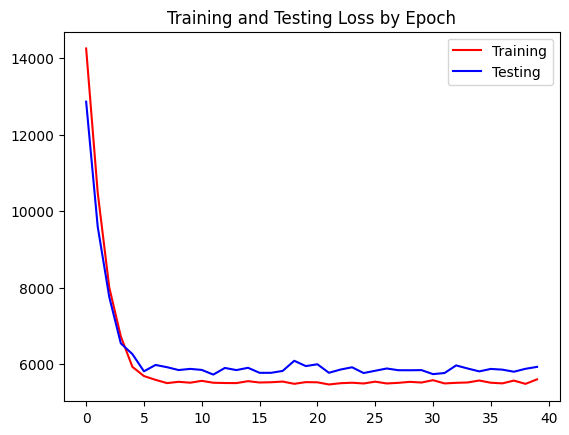

In [126]:
plt.figure()
plt.title("Training and Testing Loss by Epoch")
plt.plot(trainLossOverTime, color='red', label='Training')
plt.plot(testLossOverTime, color='blue', label='Testing')
plt.legend()
plt.show()

At first, the network improves very fast over the first few epochs, going from an mse of 14000 to start down to around 6000. However, after the first 5 or so epochs, the performance of the network starts to level out.

In [108]:
results = [0]*int(max(accuracyOverTime, key=accuracyOverTime.get))
for x in accuracyOverTime:
    results[int(x)-1] = accuracyOverTime.get(x)[0]/accuracyOverTime.get(x)[1]

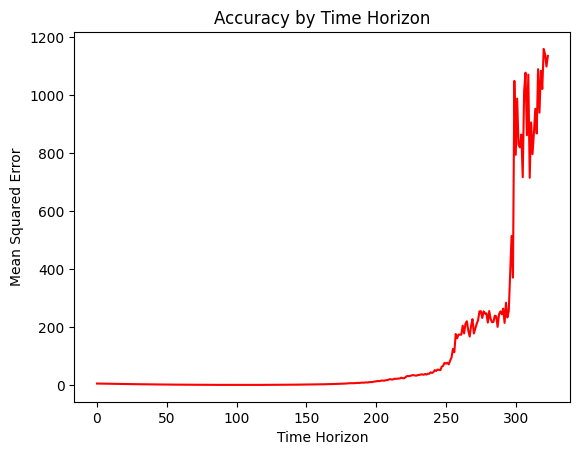

In [111]:
plt.figure()
plt.title("Accuracy by Time Horizon")
plt.xlabel("Time Horizon")
plt.ylabel("Mean Squared Error")
plt.plot(results, color='red')
plt.show()

Clearly the time horizon has a large impact in the accuracy of the move prediction. From 1 move left to about 200, there seems to be very little difference in the predictions and the actual values. However, as the game gets farther away from completion, the neural network gets worse and worse and predicting how long the game will take. I believe one of the reasons for this is because at the beginning of the game, the bot does not even have the information of where it is so, so the network does not have that information to help decide how long the game will take.

**How you are representing your input data:**

Our input data consists of two knowledge bases, the KB of the possible bot locations, and the KB of the rat location probabilities. Each knowledge base is a dxd matrix (in this case d=30) which represents the ship with open cells and closed cells. For the KB with the possible bot locations, a 0 represents a cell that is closed, a 1 represents a cell that is open but the bot cannot possibly be there, and 2 represents a cell in which the bot could be. For the KB with the rat location probabilities, each cell consists of a number between 0 and 1, which represents the probability that the rat is located in that cell. After any action the bot takes (cell sensing, pinging, or walking) we reshape the bot location and rat location probability knowledge bases into 1x900 vectors. We concatonate the flattened bot KB and the rat KB, respectively. This new 1x1800 vector is our input data.

**How you are representing your output data**

Our output data is a scalar value which, given a certain game state, represents the bot's prediction of how many moves are left to reach the rat from the initial state.


**The model architecture you are using** *Note: you need to be clear about any choices you make, no magic numbers no choosing three layers just because you felt like it.*
The structure we chose for the neural network were a sequence of linear layers. We started out with an input layer of 1800 features, this would take in the 1800 data points that we collected for our input. Then a layer passes those 1800 features to 900 features. Then three more layers from 900 to 400, 400 to 50, and finally an output layer that takes the 50 features and boils them down to one prediction feature. The reason why we decided on this gradual descent of features is because we didn't want too much information to be lost when passed from one layer to another. We felt that this was a sufficient number of layers to get an accurate prediction without costing us too much in terms of training time. We also put a sigmoid function between each hidden layer to introduce some non-linearity between the layers. This is to prevent the network from searching for linear patterns in the data, allowing the network to develop more complex patterns. The reason we landed on sigmoid functions in particular is that most of our data is going to be between 0 and 2, and we found that the sigmoid function has interesting values at these points.

**The loss you are using to evaluate your model**
We utilized the Mean Squared Error loss function to calculate the loss. We chose this loss function because we want the network to make a numerical prediction as opposed to a classification. we are interested in how close the network's estimate can get to the actual value. The closer the network can get to the actual number of moves, the lower the mse loss will be.


**How you are collecting your data**
We collected our data in one very long vector of concatonated tensors. We had the bot play out different games with randomized rat and bot locations. After every action of the bot, we would take a snapshot of the rat and bot location knowledge bases and add them to the tensor of data. These knowledge bases would be the x data that we will feed into the neural network. We would also keep track of the number of actions the bot has taken over the game. After the game is over and we know how many actions the bot used, we can subtract the number of moves the bot made at each given time from the total number of moves to get the number of moves left. This would constitute our y data.
